In [30]:
import pandas as pd

columns = ['Регионы призыва', 'ЛВО', 'БОВО', 'КОВО', 'ХВО', 'МВО', 'УРВО', 'ПривО', 'СКВО', 'САВО', 'СибВО', 'Всего']

data = [
    ['Закавказье', 1740, 2000, 2670, 665, 1350, 200, 300, 500, 905, 180, 10510],
    ['Северный Кавказ', 785, 1400, 865, '—', 400, '—', '—', '—', '—', '—', 3450],
    ['Средняя Азия', 2905, 2655, 3500, 1315, 2300, 870, 1200, 700, 1800, 580, 17825],
    ['ИТОГО', 5430, 6055, 7035, 1980, 4050, 1070, 1500, 1200, 2705, 760, 31785]
]

df = pd.DataFrame(data, columns=columns)
print(df)

   Регионы призыва   ЛВО  БОВО  КОВО   ХВО   МВО  УРВО ПривО  СКВО  САВО  \
0       Закавказье  1740  2000  2670   665  1350   200   300   500   905   
1  Северный Кавказ   785  1400   865     —   400     —     —     —     —   
2     Средняя Азия  2905  2655  3500  1315  2300   870  1200   700  1800   
3            ИТОГО  5430  6055  7035  1980  4050  1070  1500  1200  2705   

  СибВО  Всего  
0   180  10510  
1     —   3450  
2   580  17825  
3   760  31785  


Доля призывников каждого этноса в каждом округе 1938

In [31]:
import numpy as np

#предобработка данных
df = pd.DataFrame(data, columns=columns)
df = df.replace('-', 0).replace('—', 0)
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric)

def ethnic_shares(df, ethnic_group):
    row = df[df.iloc[:, 0] == ethnic_group].iloc[0]
    districts = df.columns[1:-1]  # все округа без колонки "Всего"
    total = row['Всего']
    shares = {}
    for district in districts:
        value = row[district]
        if value not in ['-', '—', 0, '0']:
            if isinstance(value, str):
                try:
                    value = float(value)
                except:
                    shares[district] = 0.0
                    continue
            shares[district] = round((value / total) * 100, 1)
        else:
            shares[district] = 0.0
    
    return shares

#вывод
ethnic_groups = df.iloc[:, 0].tolist()
for ethnic in ethnic_groups:
    if ethnic == 'ИТОГО':
        continue

    shares = ethnic_shares(df, ethnic)
    print()
    print(ethnic)
    for district, percentage in shares.items():
        print(f"{district}: {percentage}%")


Закавказье
ЛВО: 16.6%
БОВО: 19.0%
КОВО: 25.4%
ХВО: 6.3%
МВО: 12.8%
УРВО: 1.9%
ПривО: 2.9%
СКВО: 4.8%
САВО: 8.6%
СибВО: 1.7%

Северный Кавказ
ЛВО: 22.8%
БОВО: 40.6%
КОВО: 25.1%
ХВО: 0.0%
МВО: 11.6%
УРВО: 0.0%
ПривО: 0.0%
СКВО: 0.0%
САВО: 0.0%
СибВО: 0.0%

Средняя Азия
ЛВО: 16.3%
БОВО: 14.9%
КОВО: 19.6%
ХВО: 7.4%
МВО: 12.9%
УРВО: 4.9%
ПривО: 6.7%
СКВО: 3.9%
САВО: 10.1%
СибВО: 3.3%


/var/folders/y8/vxqy41y91358t2jl4c1mlxz80000gn/T/ipykernel_99778/635145834.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-', 0).replace('—', 0)


Визуализация 1938

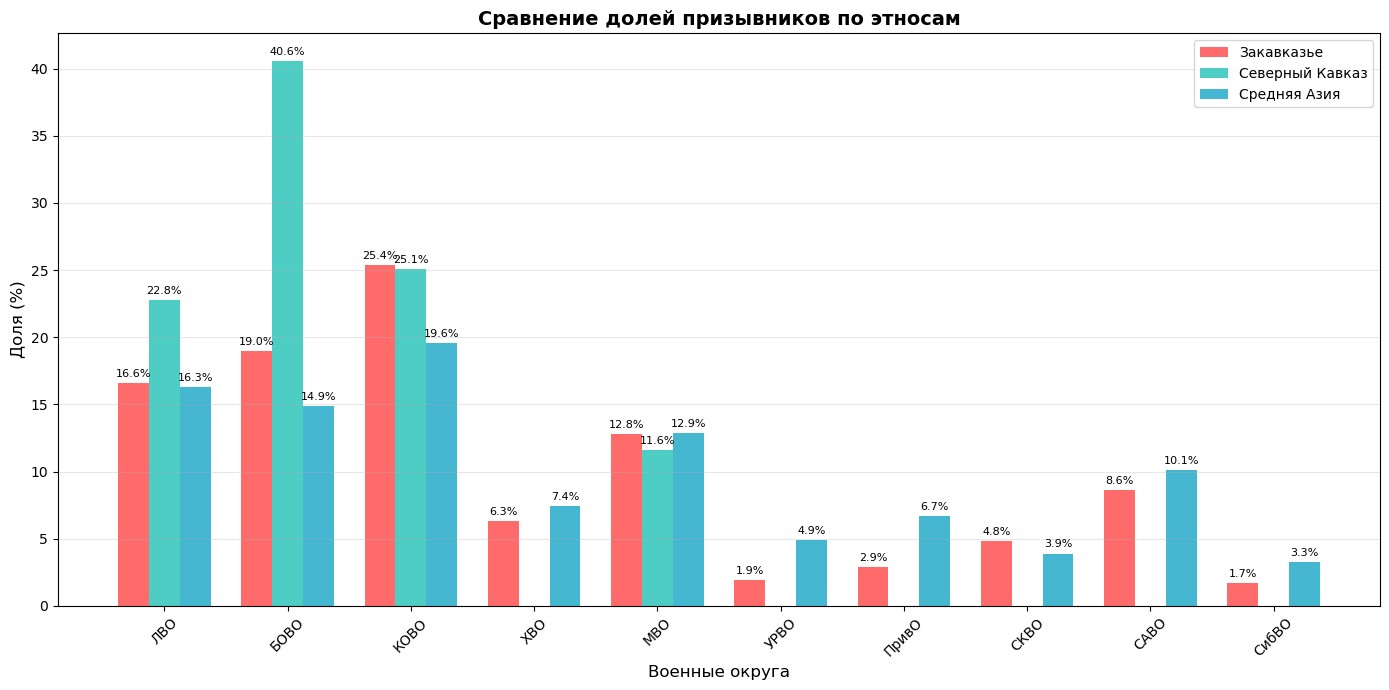

In [32]:
import matplotlib.pyplot as plt
import numpy as np

ethnic_list = ['Закавказье', 'Северный Кавказ', 'Средняя Азия']
all_districts = list(df.columns[1:-1]) 

data = []
for ethnic in ethnic_list:
    shares = ethnic_shares(df, ethnic)
    data.append([shares.get(d, 0) for d in all_districts])

x = np.arange(len(all_districts))
width = 0.25
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

plt.figure(figsize=(14, 7))
for i, (ethnic, values) in enumerate(zip(ethnic_list, data)):
    bars = plt.bar(x + i*width, values, width, label=ethnic, color=colors[i])
    for bar, val in zip(bars, values):
        if val > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                    f'{val}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('Военные округа', fontsize=12)
plt.ylabel('Доля (%)', fontsize=12)
plt.title('Сравнение долей призывников по этносам', fontsize=14, fontweight='bold')
plt.xticks(x + width, all_districts, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Доля призывников каждого этноса в каждом округе 1940

In [37]:
data = [
    ['Закавказье', 923, 2465, 9608, 743, 2053, 17, 51, 92, 1519, 18, 17489],
    ['Северный Кавказ', 644, 2113, 2490, 64, 294, 56, 191, 165, 103, 2, 6122],
    ['Средняя Азия', 2134, 13887, 5278, 269, 1434, 672, 1353, 1744, 70, 798, 27639]
]

columns = ['Регионы', 'ЛВО', 'БОВО', 'КОВО', 'ХВО', 'МВО', 'УРВО', 'ПривО', 'СКВО', 'САВО', 'СибВО', 'Всего']
df_2 = pd.DataFrame(data, columns=columns)

print(df_2)

           Регионы   ЛВО   БОВО  КОВО  ХВО   МВО  УРВО  ПривО  СКВО  САВО  \
0       Закавказье   923   2465  9608  743  2053    17     51    92  1519   
1  Северный Кавказ   644   2113  2490   64   294    56    191   165   103   
2     Средняя Азия  2134  13887  5278  269  1434   672   1353  1744    70   

   СибВО  Всего  
0     18  17489  
1      2   6122  
2    798  27639  


Доля призывников каждого этноса в каждом округе 1941

In [38]:
#предобработка данных
df_2 = pd.DataFrame(data, columns=columns)
df_2 = df_2.replace('-', 0).replace('—', 0)
df_2[df_2.columns[1:]] = df_2[df_2.columns[1:]].apply(pd.to_numeric)

def ethnic_shares_2(df, ethnic_group):
    row = df_2[df.iloc[:, 0] == ethnic_group].iloc[0]
    districts = df.columns[1:-1]  # все округа без колонки "Всего"
    total = row['Всего']
    shares = {}
    for district in districts:
        value = row[district]
        if value not in ['-', '—', 0, '0']:
            if isinstance(value, str):
                try:
                    value = float(value)
                except:
                    shares[district] = 0.0
                    continue
            shares[district] = round((value / total) * 100, 1)
        else:
            shares[district] = 0.0
    
    return shares

#вывод
ethnic_groups = df_2.iloc[:, 0].tolist()
for ethnic in ethnic_groups:
    if ethnic == 'ИТОГО':
        continue

    shares = ethnic_shares(df_2, ethnic)
    print()
    print(ethnic)
    for district, percentage in shares.items():
        print(f"{district}: {percentage}%")


Закавказье
ЛВО: 5.3%
БОВО: 14.1%
КОВО: 54.9%
ХВО: 4.2%
МВО: 11.7%
УРВО: 0.1%
ПривО: 0.3%
СКВО: 0.5%
САВО: 8.7%
СибВО: 0.1%

Северный Кавказ
ЛВО: 10.5%
БОВО: 34.5%
КОВО: 40.7%
ХВО: 1.0%
МВО: 4.8%
УРВО: 0.9%
ПривО: 3.1%
СКВО: 2.7%
САВО: 1.7%
СибВО: 0.0%

Средняя Азия
ЛВО: 7.7%
БОВО: 50.2%
КОВО: 19.1%
ХВО: 1.0%
МВО: 5.2%
УРВО: 2.4%
ПривО: 4.9%
СКВО: 6.3%
САВО: 0.3%
СибВО: 2.9%


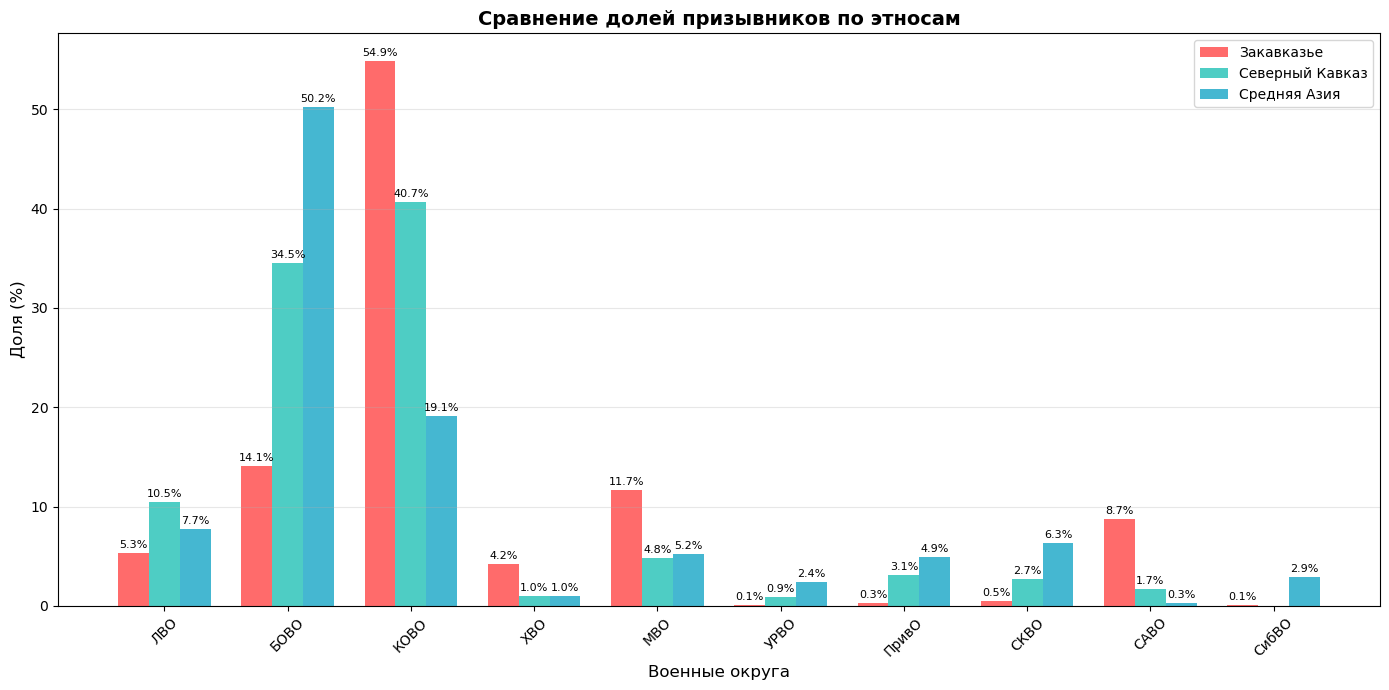

In [39]:
ethnic_list = ['Закавказье', 'Северный Кавказ', 'Средняя Азия']
all_districts = list(df.columns[1:-1]) 

data = []
for ethnic in ethnic_list:
    shares = ethnic_shares(df_2, ethnic)
    data.append([shares.get(d, 0) for d in all_districts])

x = np.arange(len(all_districts))
width = 0.25
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

plt.figure(figsize=(14, 7))
for i, (ethnic, values) in enumerate(zip(ethnic_list, data)):
    bars = plt.bar(x + i*width, values, width, label=ethnic, color=colors[i])
    for bar, val in zip(bars, values):
        if val > 0:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                    f'{val}%', ha='center', va='bottom', fontsize=8)

plt.xlabel('Военные округа', fontsize=12)
plt.ylabel('Доля (%)', fontsize=12)
plt.title('Сравнение долей призывников по этносам', fontsize=14, fontweight='bold')
plt.xticks(x + width, all_districts, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Округа для анализа: ['ЛВО', 'БОВО', 'КОВО', 'ХВО', 'МВО', 'УРВО', 'ПривО', 'СКВО', 'САВО', 'СибВО']


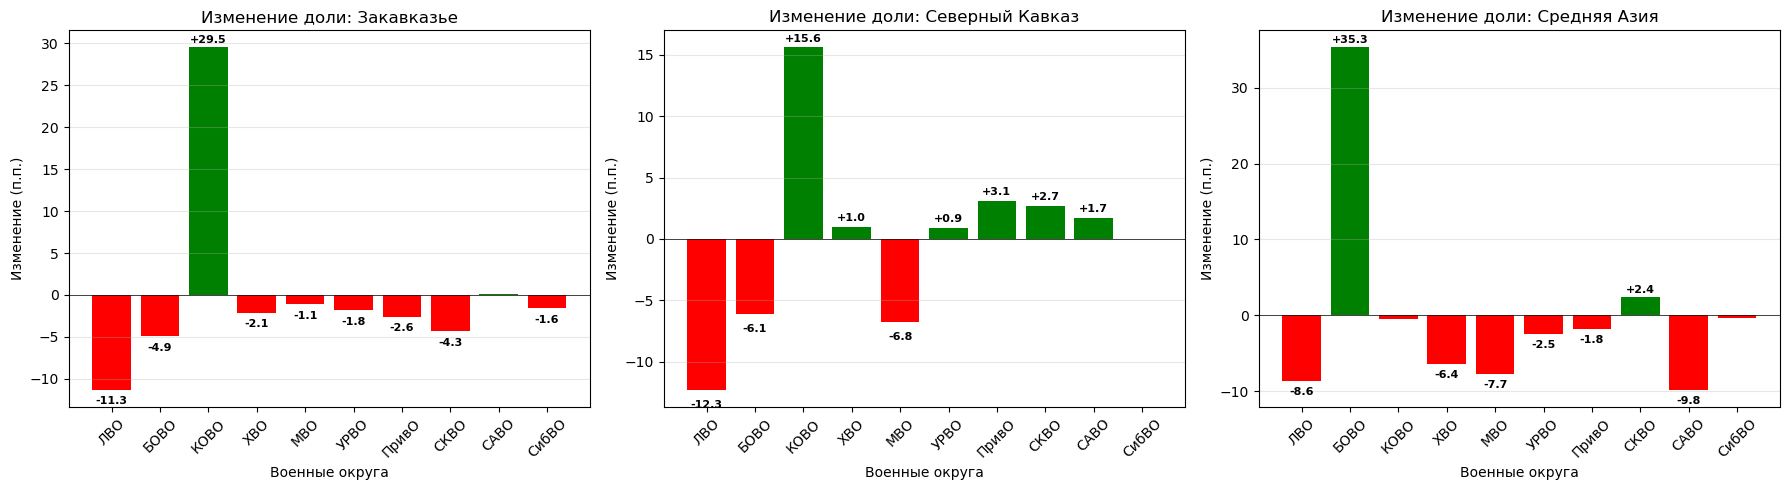

In [47]:
districts = list(df_2.columns[1:-1])  
print("Округа для анализа:", districts)

ethnic_list = ['Закавказье', 'Северный Кавказ', 'Средняя Азия']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, ethnic in enumerate(ethnic_list):
    # Получаем доли из обоих датафреймов
    shares_old = ethnic_shares(df, ethnic)
    shares_new = ethnic_shares(df_2, ethnic)
    
    changes = []
    for d in districts:
        old_val = shares_old.get(d, 0)  
        new_val = shares_new.get(d, 0)
        changes.append(new_val - old_val)
    
    colors = ['green' if c > 0 else 'red' for c in changes]
    
    bars = axes[idx].bar(districts, changes, color=colors)
    axes[idx].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    axes[idx].set_title(f'Изменение доли: {ethnic}')
    axes[idx].set_xlabel('Военные округа')
    axes[idx].set_ylabel('Изменение (п.п.)')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)
    
    for i, (bar, v) in enumerate(zip(bars, changes)):
        if abs(v) > 0.5:  
            y_pos = v + (0.3 if v > 0 else -0.8)
            va = 'bottom' if v > 0 else 'top'
            axes[idx].text(i, y_pos, f'{v:+.1f}', 
                          ha='center', va=va, fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()